<a href="https://colab.research.google.com/github/hublun/Bayesian_Aggregation_Average_Data/blob/master/ODR_2024_1_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("rstan", repos = c("https://mc-stan.org/r-packages/", getOption("repos")))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘matrixStats’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘Rcpp’, ‘RcppParallel’, ‘loo’, ‘QuickJSR’, ‘RcppEigen’, ‘BH’




In [9]:
library(rstan)

In [4]:
parallel::detectCores()

[1] 2

In [5]:
example(stan_model, package = "rstan", run.dontrun = TRUE)


stn_md> stancode <- 'data {real y_mean;} parameters {real y;} model {y ~ normal(y_mean,1);}'

stn_md> mod <- stan_model(model_code = stancode, verbose = TRUE)

TRANSLATING MODEL '' FROM Stan CODE TO C++ CODE NOW.
OS: x86_64, linux-gnu; rstan: 2.32.5; Rcpp: 1.0.12; inline: 0.3.19 
 >> setting environment variables: 
PKG_LIBS =  '/usr/local/lib/R/site-library/rstan/lib//libStanServices.a' -L'/usr/local/lib/R/site-library/StanHeaders/lib/' -lStanHeaders -L'/usr/local/lib/R/site-library/RcppParallel/lib/' -ltbb 
PKG_CPPFLAGS =   -I"/usr/local/lib/R/site-library/Rcpp/include/"  -I"/usr/local/lib/R/site-library/RcppEigen/include/"  -I"/usr/local/lib/R/site-library/RcppEigen/include/unsupported"  -I"/usr/local/lib/R/site-library/BH/include" -I"/usr/local/lib/R/site-library/StanHeaders/include/src/"  -I"/usr/local/lib/R/site-library/StanHeaders/include/"  -I"/usr/local/lib/R/site-library/RcppParallel/include/"  -I"/usr/local/lib/R/site-library/rstan/include" -DEIGEN_NO_DEBUG  -DBOOST_DISABLE_



---



In [7]:
install.packages('outbreaks')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(outbreaks)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks rstan::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [10]:
head(influenza_england_1978_school)

,date,in_bed,convalescent
,<date>,<int>,<int>
1,1978-01-22,3,0
2,1978-01-23,8,0
3,1978-01-24,26,0
4,1978-01-25,76,0
5,1978-01-26,225,9
6,1978-01-27,298,17


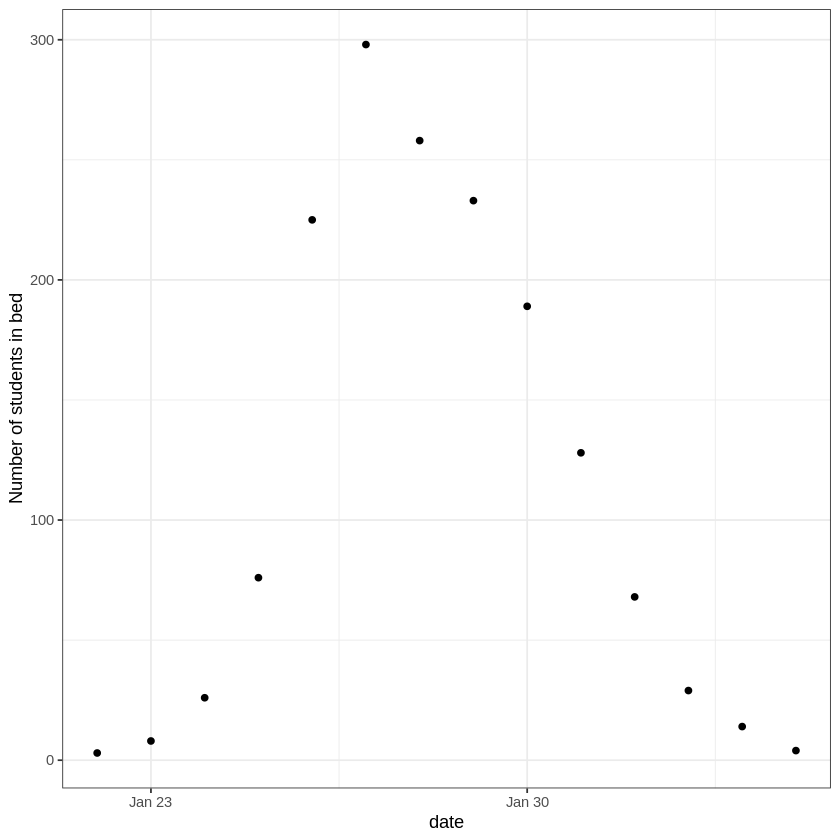

In [11]:
theme_set(theme_bw())
ggplot(data = influenza_england_1978_school) +
  geom_point(mapping = aes(x = date, y = in_bed)) +
  labs(y = "Number of students in bed")

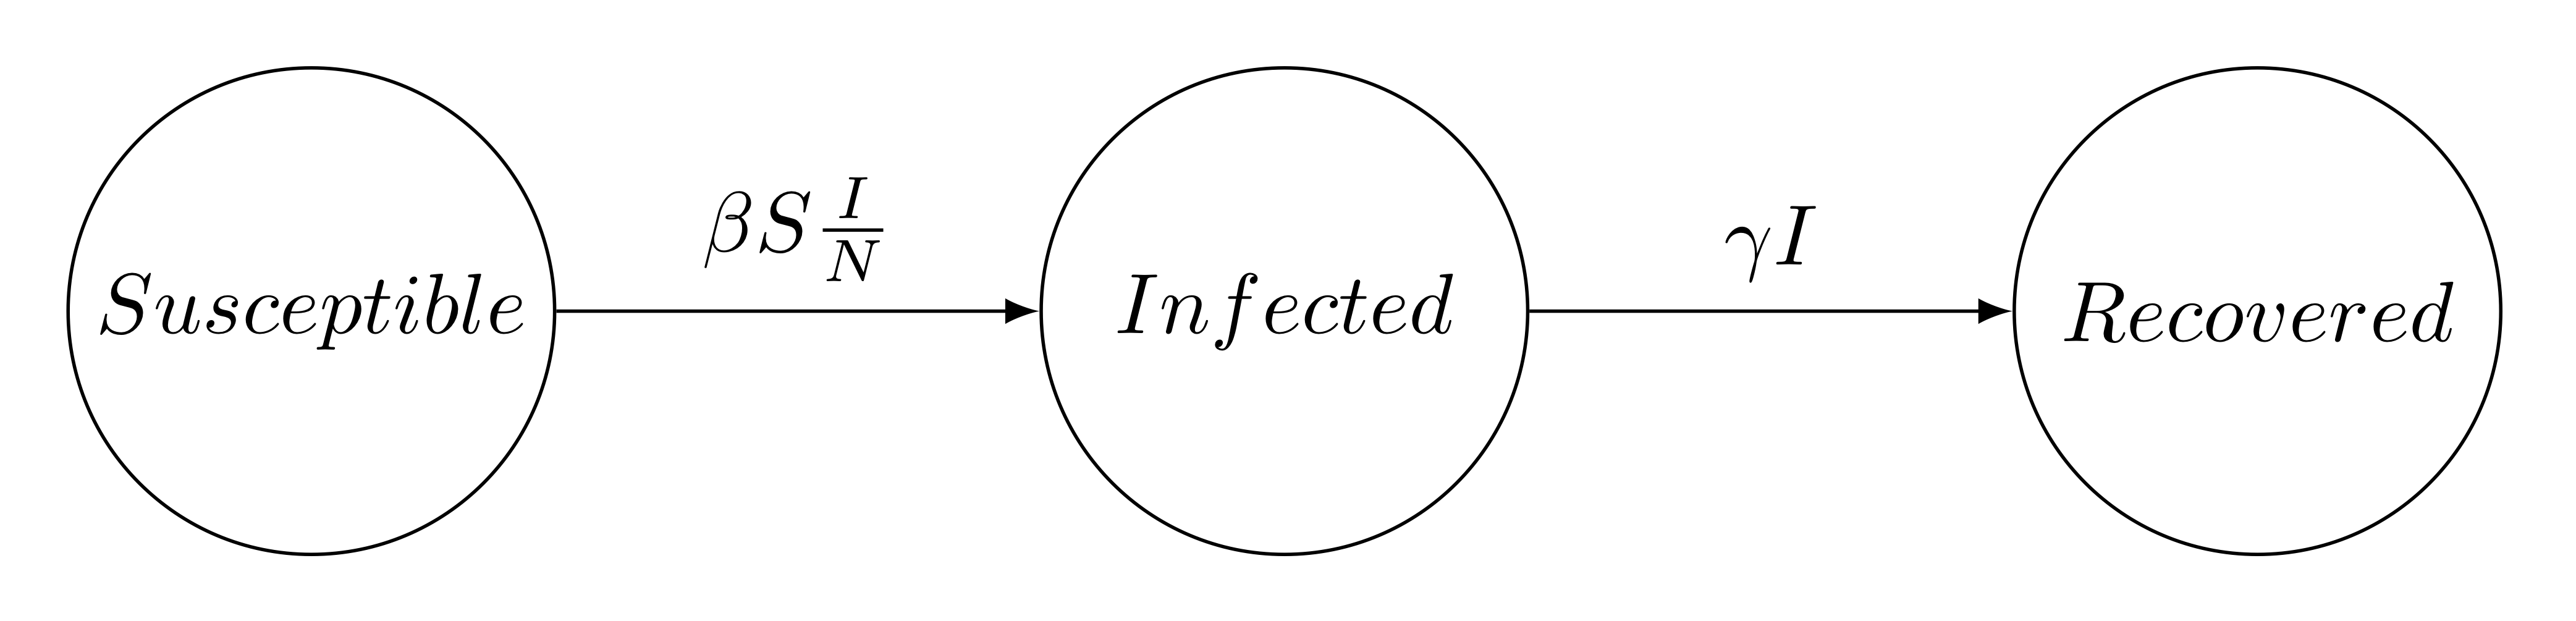

\begin{aligned}
 \frac{dS}{dt} &= -\beta  S \frac{I}{N}\\
 \frac{dI}{dt} &= \beta  S  \frac{I}{N} - \gamma  I \\
 \frac{dR}{dt} &= \gamma I
\end{aligned}


S(t)
 is the number of people susceptible to becoming infected (no immunity),

I(t)
 is the number of people currently infected (and infectious),

R(t)
 is the number of recovered people (we assume they remain immune indefinitely),

β
 is the constant rate of infectious contact between people,

γ
 the constant recovery rate of infected individuals.

In case of boarding school data, the spread of the disease has started with one infected individual which leads to the initial conditions I(0)=1,S(0)=N−1,R(0)=0.